<a href="https://colab.research.google.com/github/FredLongo/MLDL_Project/blob/main/Insomnia_ARIMA_Predictions_NK_4_24_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Team Insomnia - Stock Prediction

In [1]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.1 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np

from statsmodels.tsa.arima.model import ARIMA       #ARIMA model
import matplotlib.pyplot as plt                     # ploting Graphs
from statsmodels.graphics.tsaplots import plot_acf  # ploting more Graphs
from pmdarima.arima.utils import ndiffs             # for ndiffs evaluation
from statsmodels.graphics.tsaplots import plot_pacf # parcial graphs



In [3]:
import statsmodels.tsa

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Import Data from Files

In [5]:
#declare filenames
adm_file_path = '/content/drive/MyDrive/adm.us.txt'
msi_file_path = '/content/drive/MyDrive/msi.us.txt'
xom_file_path = '/content/drive/MyDrive/xom.us.txt'

#load files
adm_df = pd.read_csv(adm_file_path)
msi_df = pd.read_csv(msi_file_path)
xom_df = pd.read_csv(xom_file_path)


# Create index of date column
adm_df['Date'] = pd.to_datetime(adm_df['Date'])
adm_df.set_index('Date', inplace=True)

msi_df['Date'] = pd.to_datetime(msi_df['Date'])
msi_df.set_index('Date', inplace=True)

xom_df['Date'] = pd.to_datetime(xom_df['Date'])
xom_df.set_index('Date', inplace=True)


#Just the date and Closeing Column
adm_closing_prices = adm_df['Close'][0:len(adm_df['Close'])-10]
admTest = adm_df['Close'][len(adm_df['Close'])-10:len(adm_df['Close'])]

msi_closing_prices = msi_df['Close'][0:len(msi_df['Close'])-10]
msiTest = msi_df['Close'][len(msi_df['Close'])-10:len(msi_df['Close'])]

xom_closing_prices = xom_df['Close'][0:len(xom_df['Close'])-10]
xomTest = xom_df['Close'][len(xom_df['Close'])-10:len(xom_df['Close'])]


##Normilize the Data

Notes: Review video for process understanding  https://www.youtube.com/watch?v=gqryqIlvEoM

In [6]:
#Check to see if it needs to be made stationary
from statsmodels.tsa.stattools import adfuller
def checkStationary(timeSeries):
  resultFuller =  adfuller(timeSeries.dropna())
  print(f"ADF statistic : {resultFuller[0]}")
  print(f"p-value: {resultFuller[1]}")






In [7]:
def plotACF(timeSeries, titleName):
  # Corrolation between serias and its lags
  fig, (ax1, ax2) = plt.subplots(1,2, figsize = (16,8))
  ax1.plot(timeSeries)
  ax1.set_title(titleName)
  plot_acf(timeSeries, ax=ax2);


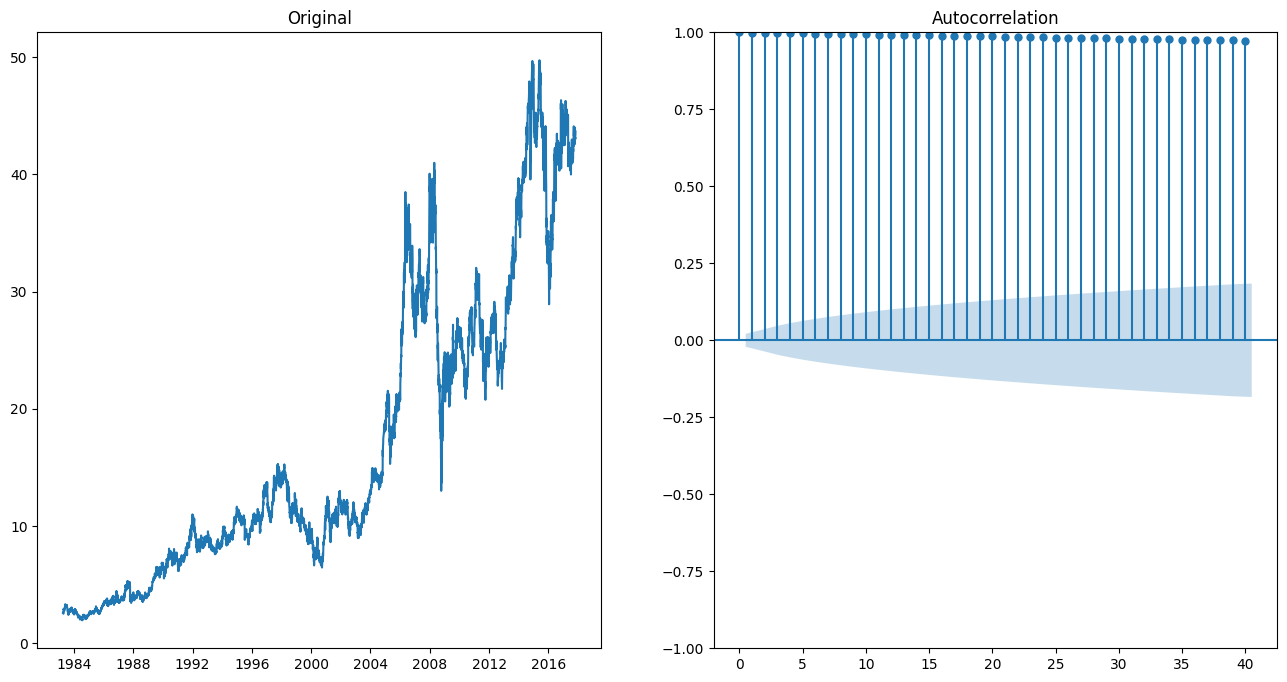

In [8]:
plotACF(adm_closing_prices, "Original")

In [9]:

# To standerdize the differential we need to know how many need to be taken.
#Used to see how many differentials should be taken
diff_num = ndiffs(adm_closing_prices, test="adf")
print(f"Number of Diffrening to run in :{diff_num}")


def x_diffs(df_: pd.DataFrame, x: int) -> pd.DataFrame:
    if x == 0:
        return df_
    else:
        return x_diffs(df_.diff().dropna(), x - 1)




Number of Diffrening to run in :1


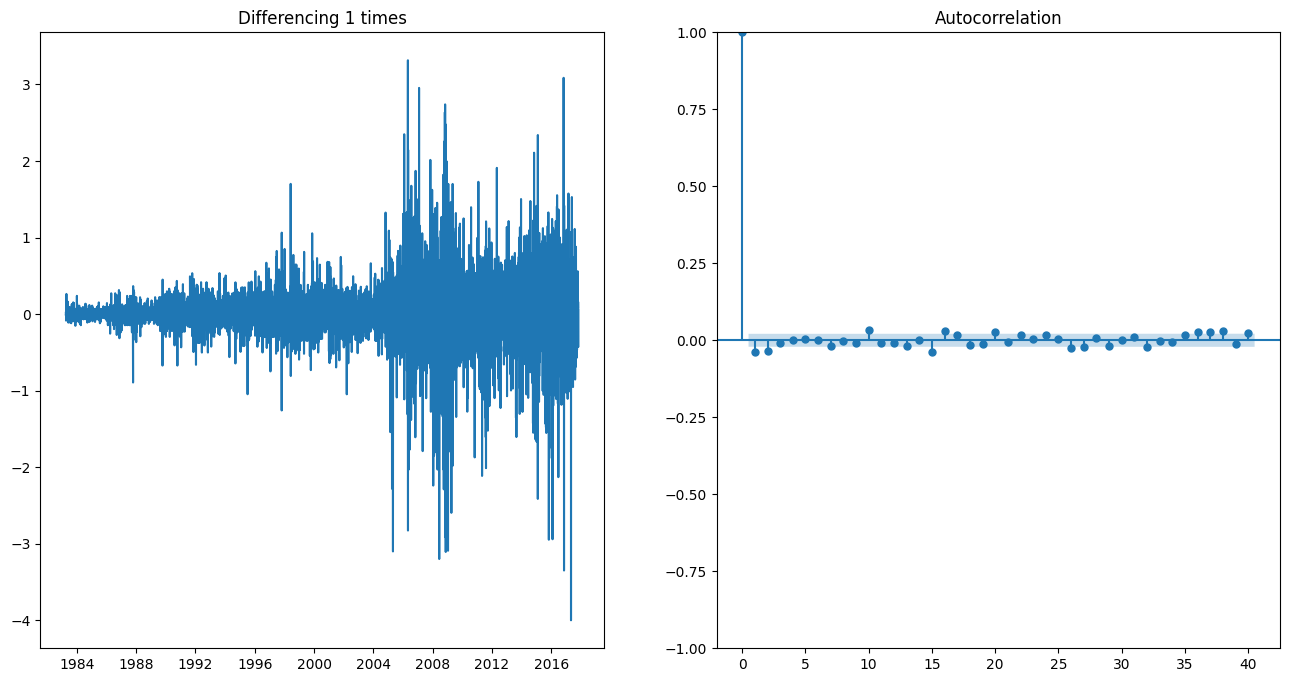

In [10]:
diff_x = x_diffs(adm_closing_prices,1)

plotACF(diff_x, "Differencing 1 times")


In [11]:
#Check stationary to see if it needs to be differenced again
checkStationary(diff_x)

#Perform the same procedure for PACF
pdiff = adm_closing_prices.diff().dropna()

ADF statistic : -14.134265997472111
p-value: 2.3048153731563996e-26


In [12]:
from statsmodels.graphics.tsaplots import plot_pacf # parcial graphs
def plotPACF(timeSeries, titleName):
  fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,8))
  ax1.plot(timeSeries)
  ax1.set_title(titleName)
  plot_pacf(timeSeries, ax=ax2)
  # Set the y-axis limits explicitly for ax2
  plt.show()


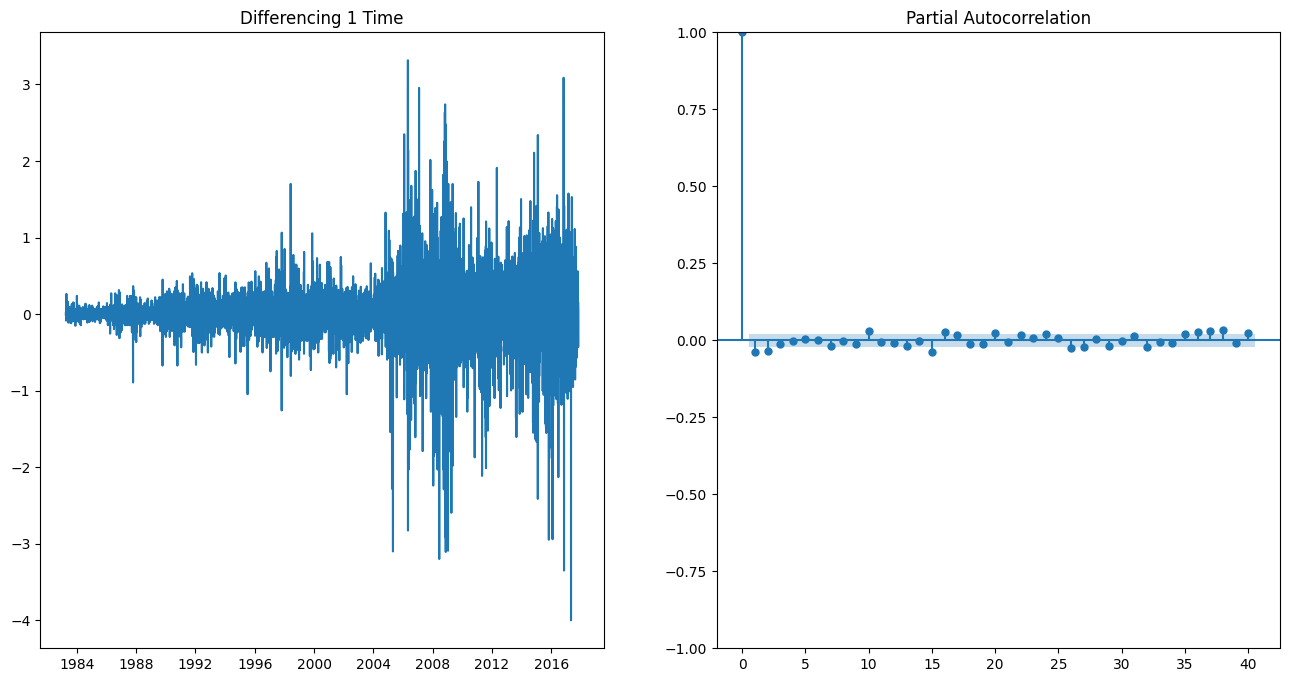

In [13]:
plotPACF(pdiff, "Differencing 1 Time")

#-------------------------------------------------------------------------------
#  Mapes are not comming out correctly.
#  They look like the ones from 'plot_acf()' but should be 'plot_pacf()'
#-------------------------------------------------------------------------------

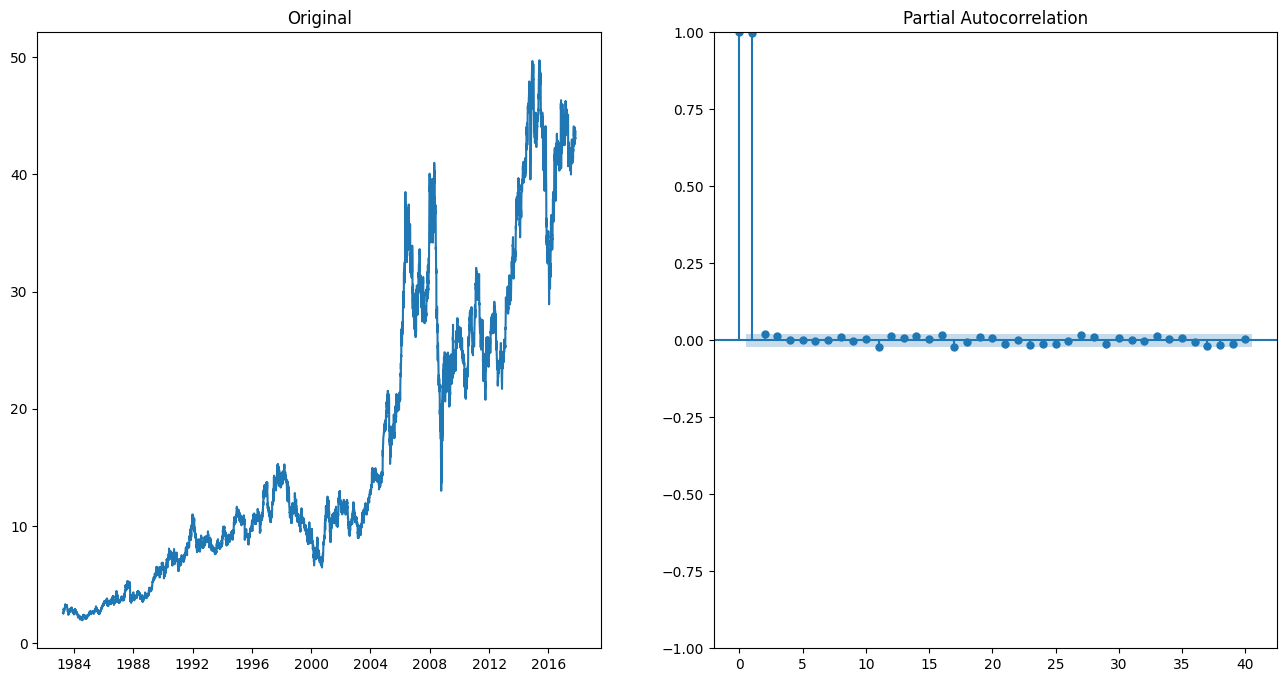

In [14]:
plotPACF(adm_closing_prices, "Original")

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-9249.382, Time=5.29 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-9261.189, Time=8.69 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-9260.765, Time=11.43 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=61205.092, Time=4.46 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-9260.919, Time=12.56 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-9260.177, Time=12.23 sec


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1898: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1905: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-9243.371, Time=13.33 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-9261.885, Time=5.95 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-9261.651, Time=11.16 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-9260.922, Time=11.81 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-9261.462, Time=10.13 sec


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1898: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1905: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-9244.165, Time=13.48 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 120.635 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 8726
Model:               SARIMAX(1, 0, 0)   Log Likelihood                4636.942
Date:                Wed, 24 Apr 2024   AIC                          -9261.885
Time:                        19:27:06   BIC                          -9219.441
Sample:                             0   HQIC                         -9247.420
                               - 8726                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Open          -0.5680      0.004   -135.921      0.000      -0.

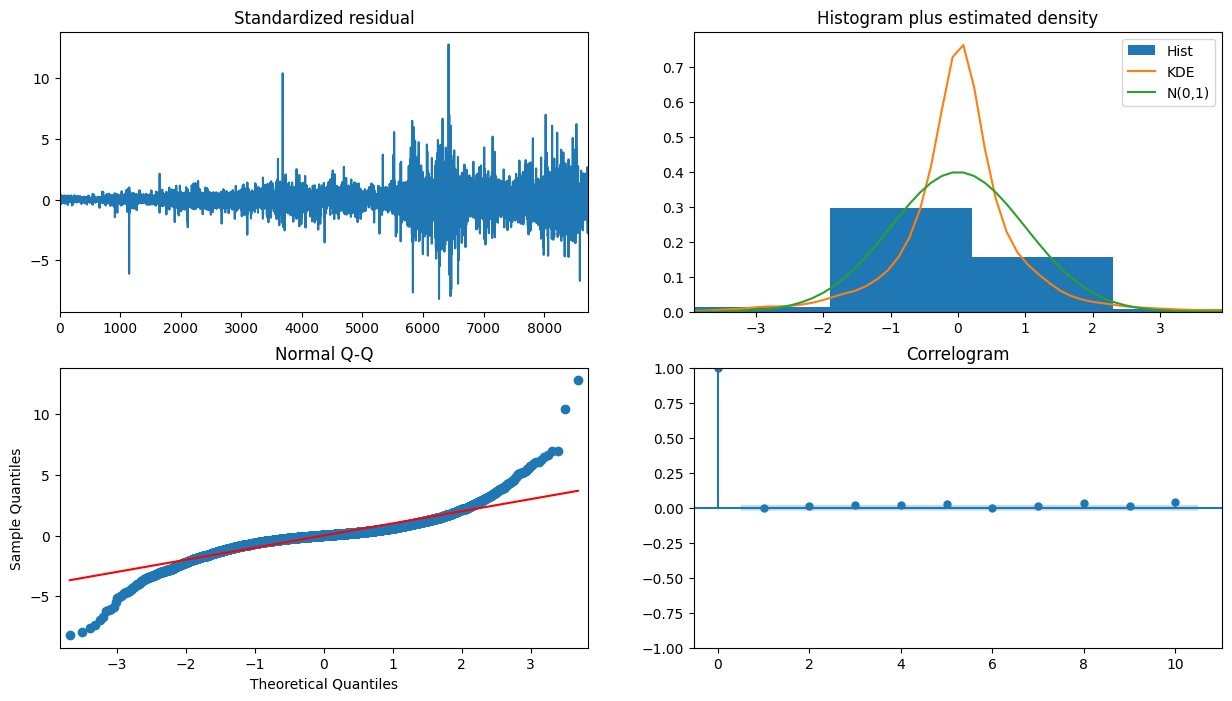

In [15]:
#Auto ARIMA to find optimal p, d, and q for ARIMA model.
#Says (1,0,0) is the optimal
#y=Data to predict
#X= exogeneous values that aid the training/testing

from pmdarima import auto_arima
model_autoARIMA = auto_arima(y=adm_df['Close'], X=adm_df[['Open', 'High', 'Low', 'Volume']], start_p=0, start_q=0,
                      test='kpss',
                      max_p=5, max_q=5, # maximum p and q
                      d=None,           # let model determine 'd'
                      seasonality = False,
                      stationary=False,
                      trace=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [16]:
adm_df['Close']


Date
1983-04-06     2.6200
1983-04-07     2.6368
1983-04-08     2.6200
1983-04-11     2.6200
1983-04-12     2.6112
               ...   
2017-11-06    39.2700
2017-11-07    39.5400
2017-11-08    39.8000
2017-11-09    39.6000
2017-11-10    39.9300
Name: Close, Length: 8726, dtype: float64

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(adm_df['Close'], model='additive', period=365)


In [18]:
if np.abs(decomposition.seasonal.mean()) > 0.05:
    print("The time series has seasonality.")
else:
    print("The time series does not have seasonality.")

The time series does not have seasonality.


## Build Model

In [19]:
!pip install statsmodels

In [20]:
from statsmodels.tsa.arima.model import ARIMA

In [45]:
# Fit the ARIMA model
# The parameters for ARIMA are (p, d, q)
# p: periods taken for autoregressive model
      # lag observations

# d: Integrated order, difference
      #
# q: periods in moving average model
print(adm_df)
model = ARIMA(adm_df['Close'], order=(1,0,0),exog=adm_df[['Open','High',"Low", "Volume"]])  # Example parameters


               Open     High      Low    Close   Volume  OpenInt
Date                                                            
1983-04-06   2.6112   2.6200   2.5771   2.6200   539368        0
1983-04-07   2.6200   2.6539   2.6200   2.6368   443347        0
1983-04-08   2.6368   2.6878   2.5944   2.6200   926108        0
1983-04-11   2.6200   2.6368   2.6112   2.6200   304998        0
1983-04-12   2.6112   2.6200   2.5771   2.6112   159510        0
...             ...      ...      ...      ...      ...      ...
2017-11-06  39.7300  39.8400  39.0950  39.2700  2881709        0
2017-11-07  39.2700  39.5700  39.2200  39.5400  4562835        0
2017-11-08  39.6500  39.8100  39.5400  39.8000  3273446        0
2017-11-09  39.6900  40.1500  39.5100  39.6000  3933849        0
2017-11-10  39.4900  39.9600  39.4500  39.9300  2591397        0

[8726 rows x 6 columns]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [46]:
result = model.fit()


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [47]:
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 8726
Model:                 ARIMA(1, 0, 0)   Log Likelihood                4638.794
Date:                Wed, 24 Apr 2024   AIC                          -9263.587
Time:                        19:45:24   BIC                          -9214.069
Sample:                             0   HQIC                         -9246.711
                               - 8726                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0048      0.004      1.070      0.285      -0.004       0.013
Open          -0.5680      0.004   -135.498      0.000      -0.576      -0.560
High           0.7982      0.003    229.386      0.0

In [48]:
# Actual vs Fitted
#result.plot_predict(start = 1, end=60, dynamic=False,)
predValues = result.forecast(10,exog=adm_df[['Open', 'High', 'Low', "Volume"]].iloc[-10:].values)
print(predValues)
print(admTest)


8726    42.775546
8727    40.799601
8728    40.386679
8729    40.559207
8730    39.800486
8731    39.321377
8732    39.462466
8733    39.685090
8734    39.910342
8735    39.826781
Name: predicted_mean, dtype: float64
Date
2017-10-30    42.81
2017-10-31    40.87
2017-11-01    40.62
2017-11-02    40.16
2017-11-03    39.78
2017-11-06    39.27
2017-11-07    39.54
2017-11-08    39.80
2017-11-09    39.60
2017-11-10    39.93
Name: Close, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [50]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import math
mse = mean_squared_error(admTest, predValues)
print('MSE: '+str(mse))
mae = mean_absolute_error(admTest, predValues)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(admTest, predValues))
print('RMSE: '+str(rmse))


r2 = r2_score(admTest, predValues)
print("R Squared: " + str(r2))



MSE: 0.034918966974692885
MAE: 0.14152488050709663
RMSE: 0.18686617397135546
R Squared: 0.963221357759035


(array([1.10024430e-03, 3.30073291e-03, 1.43031759e-02, 7.99510860e-02,
        1.17469417e+00, 1.81797034e+00, 9.09535290e-02, 1.43031759e-02,
        2.93398481e-03, 7.33496202e-04]),
 array([-1.57808134, -1.26560516, -0.95312898, -0.6406528 , -0.32817661,
        -0.01570043,  0.29677575,  0.60925193,  0.92172811,  1.23420429,
         1.54668047]),
 <BarContainer object of 10 artists>)

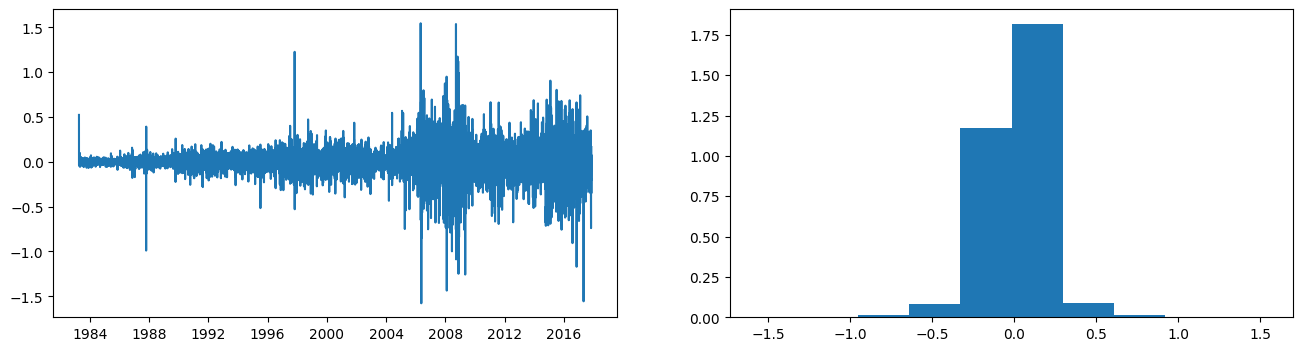

In [26]:
# plot  residual errors
residuals = pd.DataFrame(result.resid)

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (16, 4))

ax1.plot(residuals)
ax2.hist(residuals, density=1)


In [40]:
##################################################################################################################################
#MSI model
print(msi_df)
MSImodel = ARIMA(msi_df['Close'], order=(0,0,0),exog=msi_df[['Open','High',"Low", "Volume"]])  # Example parameters

              Open    High     Low   Close   Volume  OpenInt
Date                                                        
2005-02-25  55.818  56.397  55.605  56.074  1318163        0
2005-02-28  55.746  56.609  55.746  56.328  2019476        0
2005-03-01  56.249  56.468  55.282  56.212  2419471        0
2005-03-02  55.211  56.179  54.957  56.037  2025804        0
2005-03-03  56.037  56.283  54.412  54.668  2835797        0
...            ...     ...     ...     ...      ...      ...
2017-11-06  94.020  94.060  92.190  92.430  1385596        0
2017-11-07  92.400  92.650  91.680  92.110   678939        0
2017-11-08  91.990  93.110  91.400  92.660   672887        0
2017-11-09  92.000  92.110  91.260  91.610   627848        0
2017-11-10  91.280  92.000  91.000  91.070   584899        0

[3202 rows x 6 columns]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [41]:
resultMSI = MSImodel.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [42]:
print(resultMSI.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 3202
Model:                          ARIMA   Log Likelihood              -12486.251
Date:                Wed, 24 Apr 2024   AIC                          24984.503
Time:                        19:37:36   BIC                          25020.932
Sample:                             0   HQIC                         24997.563
                               - 3202                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0354     76.918      0.000      1.000    -150.721     150.792
Open          -0.4977     26.638     -0.019      0.985     -52.708      51.712
High           0.7382     26.304      0.028      0.9

In [53]:
predValues = resultMSI.forecast(10,exog=msi_df[['Open', 'High', 'Low', "Volume"]].iloc[-10:].values)
print(predValues)
print(msiTest)

3202    90.451545
3203    90.459296
3204    90.847516
3205    90.151467
3206    93.200237
3207    92.668941
3208    92.045984
3209    92.376990
3210    91.527495
3211    91.607157
Name: predicted_mean, dtype: float64
Date
2017-10-30    90.37
2017-10-31    90.54
2017-11-01    90.56
2017-11-02    90.02
2017-11-03    94.25
2017-11-06    92.43
2017-11-07    92.11
2017-11-08    92.66
2017-11-09    91.61
2017-11-10    91.07
Name: Close, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [54]:
mse = mean_squared_error(msiTest, predValues)
print('MSE: '+str(mse))
mae = mean_absolute_error(msiTest, predValues)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(msiTest, predValues))
print('RMSE: '+str(rmse))
r2 = r2_score(msiTest, predValues)
print("R Squared: " + str(r2))

MSE: 0.16517442007597904
MAE: 0.2836624605557887
RMSE: 0.4064165597954629
R Squared: 0.8939569058895266


In [61]:
######################################################
#XOM model
print(xom_df)
XOMmodel = ARIMA(xom_df['Close'], order=(3, 1, 3),exog=xom_df[['Open','High',"Low", "Volume"]])

               Open     High      Low    Close    Volume  OpenInt
Date                                                             
1970-01-02   1.4972   1.4972   1.4893   1.4972   1459617        0
1970-01-05   1.4972   1.5297   1.4972   1.5297   2338570        0
1970-01-06   1.5297   1.5297   1.5055   1.5216   1531212        0
1970-01-07   1.5216   1.5216   1.5138   1.5138   1141448        0
1970-01-08   1.5138   1.5297   1.5055   1.5138   1336326        0
...             ...      ...      ...      ...       ...      ...
2017-11-06  82.5360  83.1010  82.2980  82.9820   9360223        0
2017-11-07  82.9720  83.0510  82.3380  82.8140   8508720        0
2017-11-08  82.5960  82.7340  82.1000  82.7050   8771697        0
2017-11-09  82.5360  83.3680  82.3180  83.2000  10575654        0
2017-11-10  83.0100  83.0800  82.4200  82.9400   8693290        0

[12074 rows x 6 columns]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [62]:
resultXOM = XOMmodel.fit()
print(resultXOM.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                12074
Model:                 ARIMA(3, 1, 3)   Log Likelihood                -161.935
Date:                Wed, 24 Apr 2024   AIC                            345.870
Time:                        19:53:02   BIC                            427.255
Sample:                             0   HQIC                           373.162
                              - 12074                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Open          -0.6806      0.003   -245.213      0.000      -0.686      -0.675
High           0.7857      0.004    213.399      0.000       0.779       0.793
Low            0.7026      0.003    247.474      0.0

In [63]:
predValues = resultXOM.forecast(10,exog=xom_df[['Open', 'High', 'Low', "Volume"]].iloc[-10:].values)
print(predValues)
print(xomTest)

12074    83.145053
12075    82.773911
12076    83.211131
12077    82.642935
12078    82.890281
12079    83.076080
12080    82.771422
12081    82.608354
12082    83.301069
12083    82.823377
Name: predicted_mean, dtype: float64
Date
2017-10-30    82.774
2017-10-31    82.586
2017-11-01    83.101
2017-11-02    82.764
2017-11-03    82.417
2017-11-06    82.982
2017-11-07    82.814
2017-11-08    82.705
2017-11-09    83.200
2017-11-10    82.940
Name: Close, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [65]:
mse = mean_squared_error(xomTest, predValues)
print('MSE: '+str(mse))
mae = mean_absolute_error(xomTest, predValues)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(xomTest, predValues))
print('RMSE: '+str(rmse))
r2 = r2_score(xomTest, predValues)
print("R Squared: " + str(r2))
type(xomTest)

MSE: 0.04675920028367041
MAE: 0.17144379157153367
RMSE: 0.21623875758908348
R Squared: 0.0629307985070311


pandas.core.series.Series

In [36]:
from pmdarima import auto_arima

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2342.566, Time=3.88 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2342.721, Time=4.44 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2342.676, Time=8.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=24984.763, Time=2.77 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2346.086, Time=8.37 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 27.568 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3202
Model:                        SARIMAX   Log Likelihood               -1165.283
Date:                Wed, 24 Apr 2024   AIC                           2342.566
Time:                        19:36:50   BIC                           2378.995
Sample:                             0   HQIC                          2355.626
                               - 3202                                     

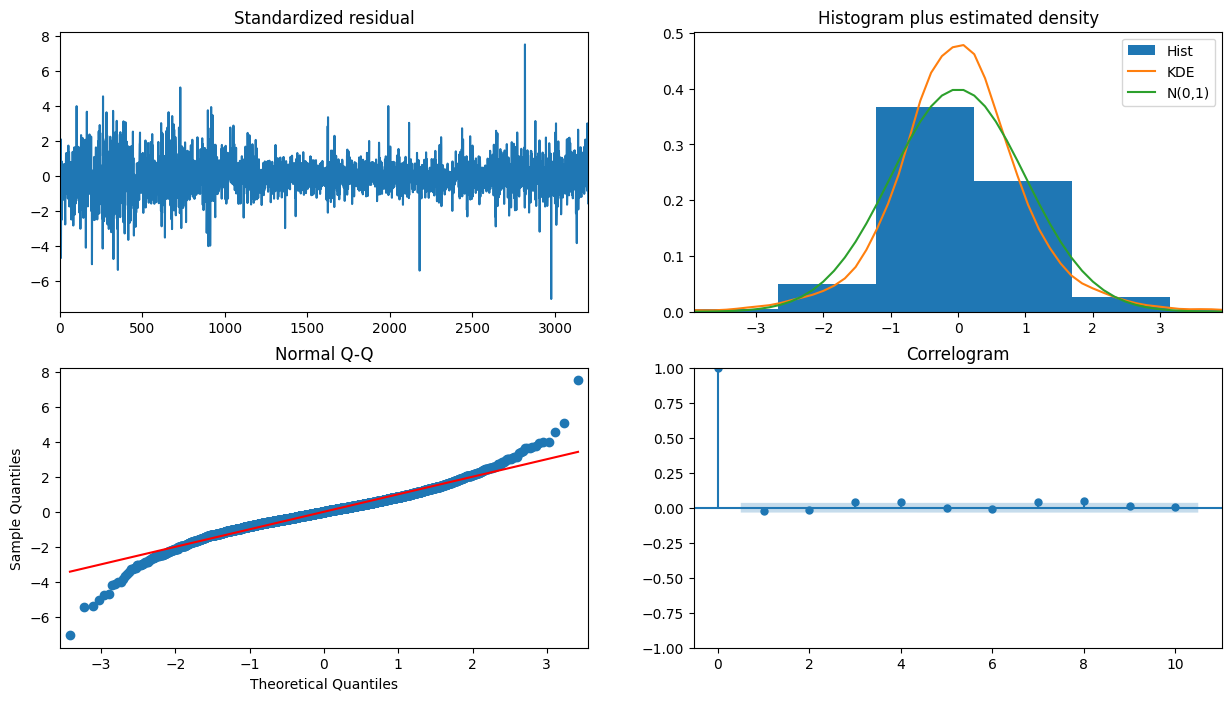

In [39]:
model_autoARIMA = auto_arima(y=msi_df['Close'], X=msi_df[['Open', 'High', 'Low', 'Volume']], start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-3260.223, Time=8.52 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-3296.670, Time=8.70 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-3294.597, Time=15.24 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=98146.403, Time=8.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-3302.750, Time=16.28 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-3301.687, Time=19.56 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-3303.257, Time=20.18 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-3301.537, Time=18.01 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-3299.823, Time=21.63 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-3301.417, Time=23.28 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-3301.922, Time=20.40 sec


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1898: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1905: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-3250.126, Time=24.88 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-3304.971, Time=16.99 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-3303.130, Time=15.69 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-3304.327, Time=14.95 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=-3301.408, Time=19.07 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-3303.934, Time=20.30 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-3298.225, Time=7.00 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-3303.530, Time=19.32 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=-3303.271, Time=18.09 sec


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1898: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1905: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(3,0,2)(0,0,0)[0]             : AIC=-3251.728, Time=21.67 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0]          
Total fit time: 357.887 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                12074
Model:               SARIMAX(2, 0, 1)   Log Likelihood                1660.486
Date:                Wed, 24 Apr 2024   AIC                          -3304.971
Time:                        19:34:48   BIC                          -3245.781
Sample:                             0   HQIC                         -3285.122
                              - 12074                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Open          -0.5893   1.62e-05  -3.63e+04      0.000      -0.

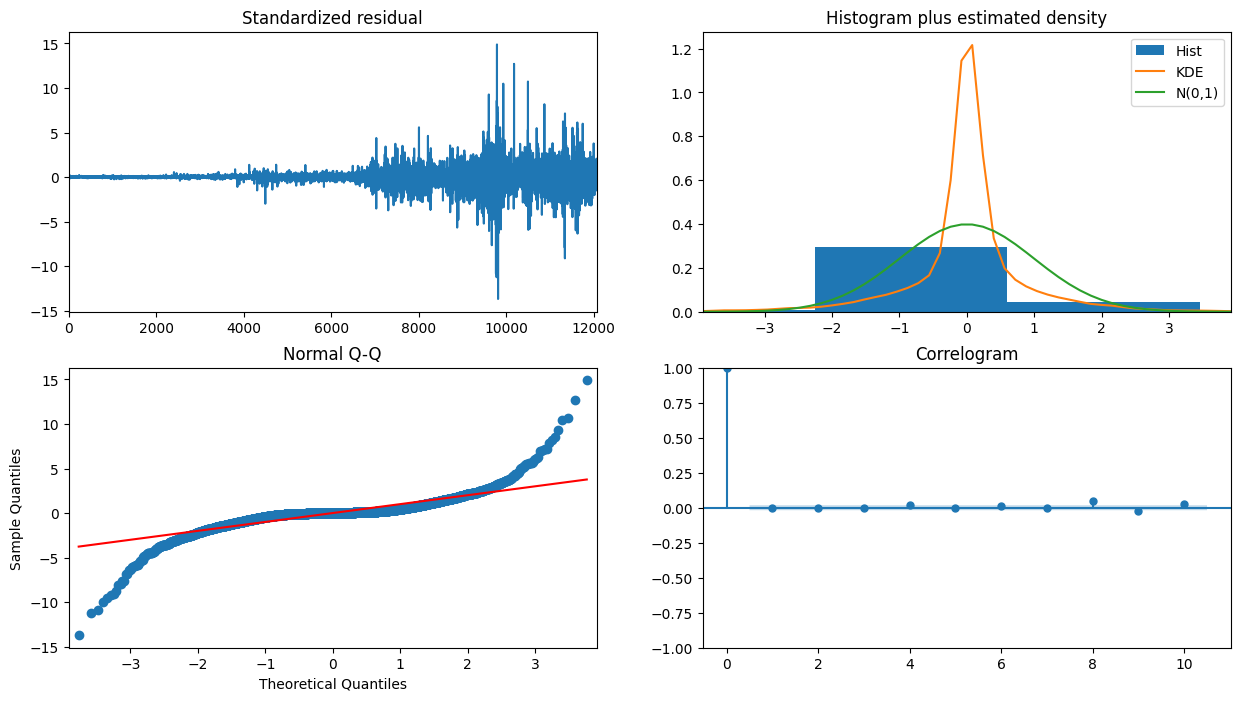

In [38]:
model_autoARIMA = auto_arima(y=xom_df['Close'], X=xom_df[['Open', 'High', 'Low', 'Volume']], start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()